# 4.0 NumPy

- Short for Numerical Python
- Most computational packages providing scientific functionality use NumPy's array objects as the *lingua fraca* for data exchange

## Features

- `ndarray`, an efficient multidimensional array providing fast array-oriented arithmetic operations and flexible broadcasting capabilities
- Mathematical functions for fast operations on arrays
- Tools for reading/writing array to disk and working with memory-mapped files
- Linear algebra, RNG, Fourier transform
- A C API

For data analysis applications, the main areas of functionality are:

- Fast vectorized array operations for data munging and cleaning, subsetting and filtering, transformation, etc.
- Common array algorithms like sorting, unique, set operations
- Efficient descriptive statistics and aggregating/summarizing data
- Data alignment and relational data manipulations for merging and joining together heterogeneous datasets
- Expressing conditional logic as array expressions instead of loops with conditionals
- Group-wise data manipulations (aggregation, transformation, function application)

## Internals

NumPy is designed for efficiency on large arrays of data.

- Internally stores data in a contiguous block of memory, independent of other built-in Python objects
- NumPy's library of algorithms written in C can operate on this memory without type checking or overhead
- NumPy arrays use much less memory than built-in Python sequences
- NumPy-based algorithms are generally 10 to 100 times faster than their pure Python counterparts


In [7]:
import numpy as np

# benchmark
np_arr = np.arange(10 ** 6)
%time for _ in range(10): np_arr_2 = np_arr * 2

py_arr = list(range(10 ** 6))
%time for _ in range(10): py_arr_2 = [x * 2 for x in py_arr]

CPU times: user 15.6 ms, sys: 15.3 ms, total: 31 ms
Wall time: 31 ms
CPU times: user 587 ms, sys: 144 ms, total: 730 ms
Wall time: 731 ms


# 4.1 The NumPy `ndarray`: A multidimensional array object

- fast, flexable container for large datasets in Python
- arrays enable one to perform mathematical operations on whole blocks of data using similar syntax to the equivalent operations between scalar elements

In [11]:
import numpy as np

data = np.random.randn(2, 3)

print("data: {}".format(data))
print("data * 10: {}".format(data * 10))
print("data + data: {}")

data: [[ 0.31575946 -0.5270217   0.19727568]
 [ 1.92838631 -0.27957866  1.27090046]]
data * 10: [[ 3.15759463 -5.27021702  1.97275681]
 [19.28386313 -2.79578657 12.70900465]]


In [12]:
import numpy as np

data = np.random.randn(2, 3)

print("data.shape: {}".format(data.shape))
print("data.dtype: {}".format(data.dtype))

data.shape: (2, 3)
data.dtype: float64


## Creating ndarrays

- `array` function: accepts any sequence-like object including other arrays and produces a new NumPy array containing the passed data



In [16]:
import numpy as np

flat = [1, 2.0, 3, 4]
np_flat = np.array(flat)

np_flat

array([1., 2., 3., 4.])

In [17]:
import numpy as np

nested = [[1,2,3,4], [5,6,7,8]]
np_nested = np.array(nested)

np_nested

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [19]:
# ndim: number of array dimensions
import numpy as np
np.array([[1,2,3,4], [5,6,7,8]]).ndim

2

In [20]:
# shape: tuple of array dimensions
import numpy as np
np.array([[1,2,3,4], [5,6,7,8]]).shape

(2, 4)

In [21]:
# dtype: Data-type of the array’s elements.
import numpy as np
np.array([[1,2,3,4], [5,6,7,8]]).dtype

dtype('int64')

In [23]:
# zeros, ones: create arrays of 0s and 1s
np.zeros((2,3,2))

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

In [24]:
# arange: array-valued version of the built-in Python range function
import numpy as np
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## Data Types for ndarrays

- the *data type* or `dtype` is a special object containing the metadata the ndarray needs to interpret a chunk of memory as a particular type of data


In [30]:
import numpy as np
np.array([1,2,3], dtype=np.float64)

array([1., 2., 3.])

In [29]:
import numpy as np
np.array([1,2,3], dtype=np.int32)

array([1, 2, 3], dtype=int32)

In [31]:
# astype: one can explicitly convert or cast an array
import numpy as np
np.array([1,2,3,4,5]).astype(np.float64)

array([1., 2., 3., 4., 5.])

In [33]:
# astype: one can explicitly convert or cast an array
import numpy as np
np.array(['1.25', '-9.6', '42'], dtype=np.string_).astype(float)

array([ 1.25, -9.6 , 42.  ])

## Arithmetic with NumPy Arrays

- Vectorization: express batch operations on data without writing any for loops
- Broadcasting: operations between differently sized arrays


In [35]:
import numpy as np
arr = np.array([[1., 2., 3.], [4., 5., 6.]])

arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [36]:
import numpy as np
arr = np.array([[1., 2., 3.], [4., 5., 6.]])

arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [37]:
import numpy as np
arr = np.array([[1., 2., 3.], [4., 5., 6.]])

1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [39]:
import numpy as np
arr = np.array([[1., 2., 3.], [4., 5., 6.]])

arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

In [41]:
import numpy as np
lhs = np.array([[1., 2., 3.], [4., 5., 6.]])
rhs = np.array([[4., 5., 6.], [1., 2., 3.]])

lhs > rhs

array([[False, False, False],
       [ True,  True,  True]])

## Basic Indexing and Slicing

- array slices are *views* on the original array, so the data is not copied and any modifications to the view will be reflected in the source array
- should you want a copy of a slie of an ndarray instead of a view, you will need to explicitly copy the array: `arr[5:8].copy()`

In [45]:
import numpy as np

arr = np.arange(10)
print("arr[5]: {}".format(arr[5]))
print("arr[5:8]: {}".format(arr[5:8]))

arr[5]: 5
arr[5:8]: [5 6 7]


In [46]:
import numpy as np

arr = np.arange(10)
arr[5:8] = 12
print(arr)

[ 0  1  2  3  4 12 12 12  8  9]


In [49]:
import numpy as np

arr = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(arr[2][0])
print(arr[2, 0])

7
7


In [50]:
import numpy as np

arr = np.array([[1,2,3], [4,5,6], [7,8,9]])
arr[:2, 1:]

array([[2, 3],
       [5, 6]])

## Boolean Indexing

- one can use a boolean array as an array indexer
- it will not fail even if the boolean array is not the correct length

In [72]:
import numpy as np

indexer = (np.arange(10) % 2 == 0)
arr = np.arange(10)
arr[indexer]

array([0, 2, 4, 6, 8])

In [71]:
import numpy as np

indexer = (np.arange(10) % 2 == 0)
arr = np.arange(10)
arr[~indexer]  # negate

array([1, 3, 5, 7, 9])

In [70]:
import numpy as np

mask = (np.arange(10) % 2 == 0) | (np.arange(10) % 5 == 0)
arr = np.arange(10)
arr[mask]

array([0, 2, 4, 5, 6, 8])

## Fancy Indexing

- indexing using integer arrays
- allows one to select out a subset of the rows in a particular order
- fancy indexing always copies the data into a new array


In [74]:
import numpy as np

arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i

arr[[4,3,0,6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [76]:
import numpy as np

arr = np.arange(32).reshape((8, 4))

# selected elements (1,0), (5,3), (7,1), (2,2)
arr[[1,5,7,2], [0,3,1,2]]

array([ 4, 23, 29, 10])

## Transposing Arrays and Swapping Axes

- `transpose` and `T` attribute: transpose the array, returns a view on the underlying data without copying
- for higher dimensional arrays, `transpose` accepts a tuple of axis numbers to permute the axes
- `swapaxes` takes a pair of axis numbers and switches the indicated axes to rearrange the data


In [77]:
import numpy as np

arr = np.arange(15).reshape((3,5))
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [78]:
import numpy as np

arr = np.arange(15).reshape((3,5))
np.dot(arr.T, arr)  # compute the dot product

array([[125, 140, 155, 170, 185],
       [140, 158, 176, 194, 212],
       [155, 176, 197, 218, 239],
       [170, 194, 218, 242, 266],
       [185, 212, 239, 266, 293]])

# 4.2 Universal Functions: Fast Element-Wise Array Functions

- `ufunc`: a function that performs element-wise operations on data in ndarrays, e.g., 
    - unary funcs: `sqrt`, `exp`
    - binary funcs: `maximum`, `add`
   

In [80]:
import numpy as np
arr = np.arange(5)

print(np.sqrt(arr))
print(np.exp(arr))

[0.         1.         1.41421356 1.73205081 2.        ]
[ 1.          2.71828183  7.3890561  20.08553692 54.59815003]


In [81]:
import numpy as np
x = np.random.randn(4)
y = np.random.randn(4)

np.maximum(x, y)

array([1.62728379, 0.82614579, 0.8592706 , 1.13366215])

In [89]:
# ufuncs accept an optional out argument to allows them to operate in-place on arrays
import numpy as np

arr = np.arange(5, dtype=np.float64)
np.sqrt(arr, out=arr)
print(arr)

[0.         1.         1.41421356 1.73205081 2.        ]


# 4.3 Array-Oriented Programming with Arrays

- using numpy arrays enables one to express many kinds of data processing tasks as concise array expressions
- vectorization: the practice of replacing explicit loops with array expressions
    - in general, vectorized array operations will often be one or two orders of magnitude faster than the pure Python counterpart

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

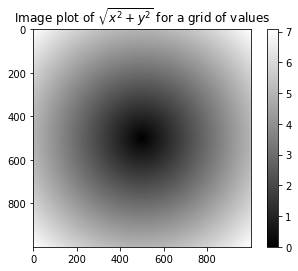

In [95]:
import numpy as np

points = np.arange(-5, 5, 0.01)  # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)  # cartesian product
z = np.sqrt(xs ** 2 + ys ** 2)

import matplotlib.pyplot as plt

plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

## Expressing Conditional Logic as Array Operations

- `numpy.where` function is a vectorized version of the ternary expression `x if cond else y`


In [96]:
import numpy as np

xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

np.where(cond, xarr, yarr)

array([1.1, 2.2, 1.3, 1.4, 2.5])

## Mathematical and Statistical Methods

- mathematical functions that compute statistics about an entire array or about the data along an axis 

In [101]:
import numpy as np

arr = np.random.randn(5,4)
print(arr.mean())
print(arr.sum(axis=0))
print(np.sum(arr))

-0.08313375632473205
[-4.82476332  2.55980641 -0.8074779   1.40975968]
-1.662675126494641


## Methods for Boolean Arrays

- boolean values are coerced to 1 (True) and 0 (False) in the aggregating methods
- two additional methods: `any` and `all` 



In [102]:
import numpy as np

bools = np.array([False, True, False])
print("any: {}".format(bools.any()))
print("all: {}".format(bools.all()))

any: True
all: False


## Sorting

- `sort`: sort in place
- one can sort each one-dimensional section of values in a multidimensional array in-place along an axis by passing the axis number to sort

In [103]:
import numpy as np

arr = np.random.randn(6)
arr.sort()
arr

array([-1.39603513, -0.72012854, -0.37116695,  0.58806664,  0.76336758,
        1.12028144])

In [104]:
import numpy as np

arr = np.random.randn(5, 3)
print("pre-sort: {}".format(arr))
arr.sort(1)  # sort in place, np.sort returns a copy
print("post-sort: {}".format(arr))

pre-sort: [[ 0.58991982  0.41908244  1.40865273]
 [-0.0243949   0.52857422  0.30579163]
 [-1.52058125  2.48798157  0.5846316 ]
 [-0.20077814  0.8037107   0.85052545]
 [ 1.23711012  0.4846577   0.47204611]]
post-sort: [[ 0.41908244  0.58991982  1.40865273]
 [-0.0243949   0.30579163  0.52857422]
 [-1.52058125  0.5846316   2.48798157]
 [-0.20077814  0.8037107   0.85052545]
 [ 0.47204611  0.4846577   1.23711012]]


## Unique and Other Set Logic

- Numpy has some basic set operations for one-dimensional ndarrays
- `np.unique` returns sorted unique values in an array
- `np.in1d` tests membership of the values in one array in another, returning a boolean array

# 4.4 File Input and Output with Arrays

- NumPy is able to save and load data to and from disk either in text or binary format
- most uses will prefer pandas and other tools for loading text or tabular data
- `np.save` and `np.load` are the two workhorse functions for efficiently saving and loading array data on disk
- arrays are saved by default in an uncompressed raw binary format with file extension `.npy`
- `savez`: save multiple arrays in an uncompressed archive, `savez_compressed` for compressed

In [108]:
import numpy as np
arr = np.arange(10)

import os
os.makedirs('temp', exist_ok=True)
np.save('temp/random_array', arr)

In [109]:
import numpy as np
np.load('temp/random_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# 4.7 Example: Random Walks

- A random walk is a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers.


In [110]:
import numpy as np

nsteps = 1000
draws = np.random.randint(low=0, high=2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()
print("Minimum value along the walk trajectory: {}".format(walk.min()))
print("Maximum value along the walk trajectory: {}".format(walk.max()))
print("First time crossing 10: {}".format((np.abs(walk) >= 10).argmax()))

Minimum value along the walk trajectory: -31
Maximum value along the walk trajectory: 16
First time crossing 10: 91


## Simulating Many Random Walks at Once

- generate all of the random walks
- `numpy.random` can generate a two-dimensional array of draws
- compute the cumulative sum across the rows to compute all 5000 random walks at once

In [113]:
import numpy as np

nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
print("Minimum value in all walks' trajectory: {}".format(walks.min()))
print("Maximum value in all walks' trajectory: {}".format(walks.max()))

hits30 = (np.abs(walks) >= 30).any(1)
print("Number of walks that hit +30 or -30: {}".format(hits30.sum()))

crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
print("Average number of steps to cross 30: {}".format(crossing_times.mean()))

Minimum value in all walks' trajectory: -127
Maximum value in all walks' trajectory: 117
Number of walks that hit +30 or -30: 3356
Average number of steps to cross 30: 500.86710369487486
